# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [ ]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    plt.show()

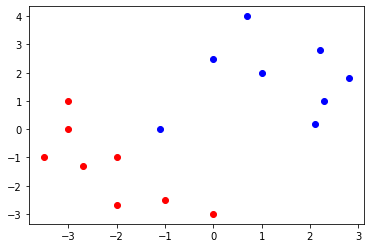

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

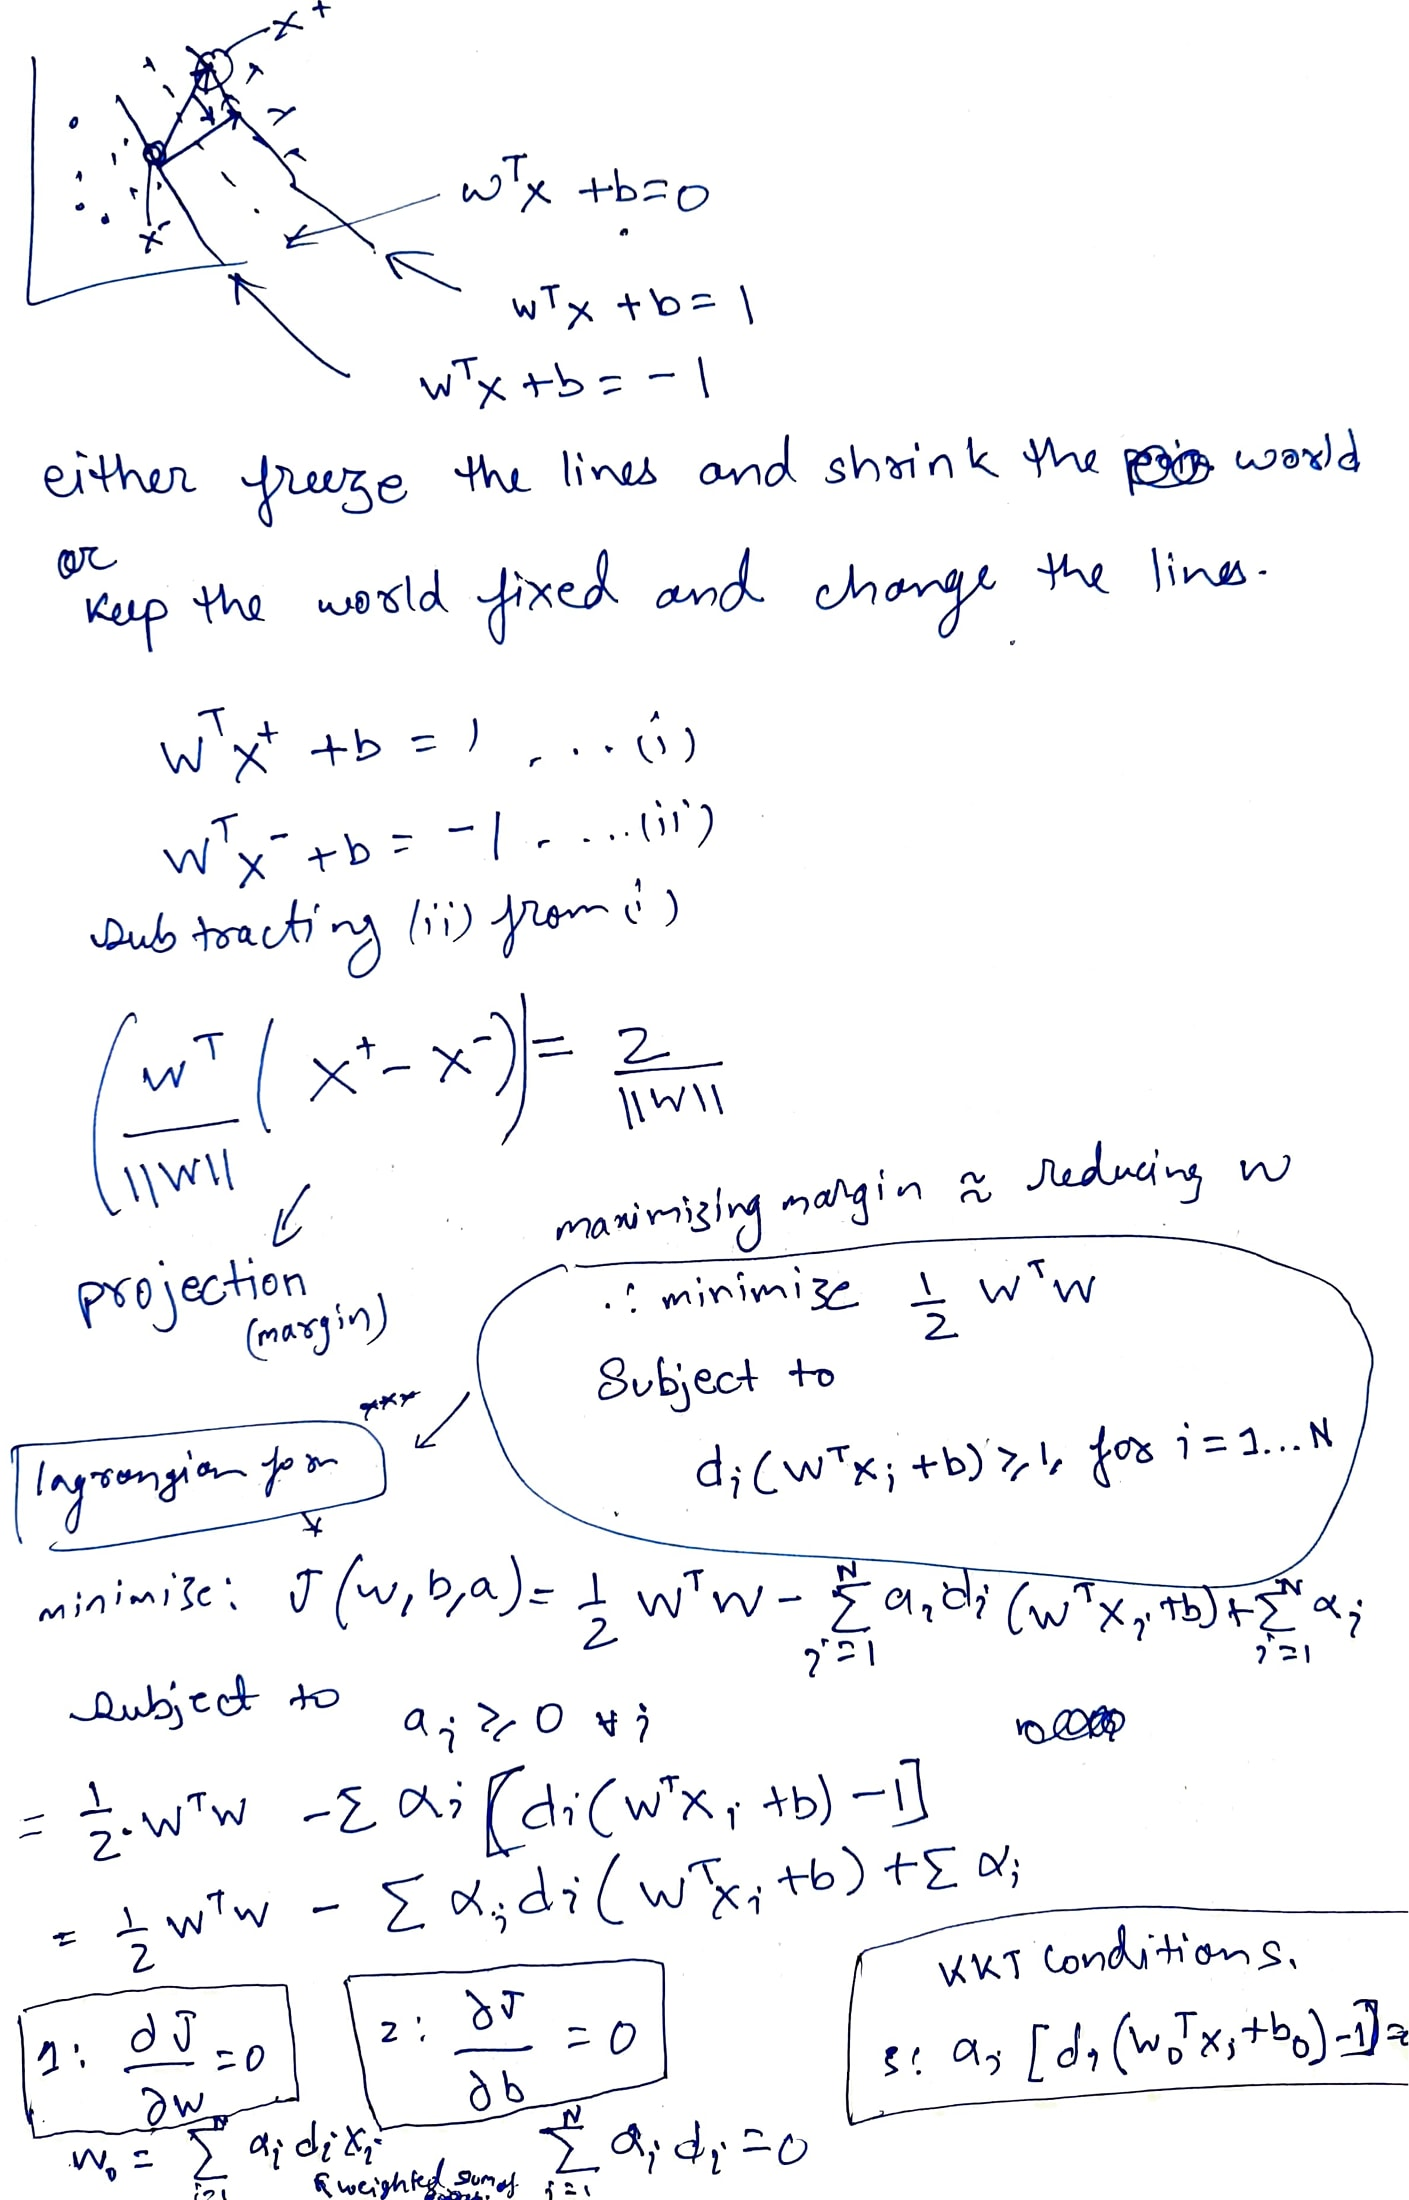

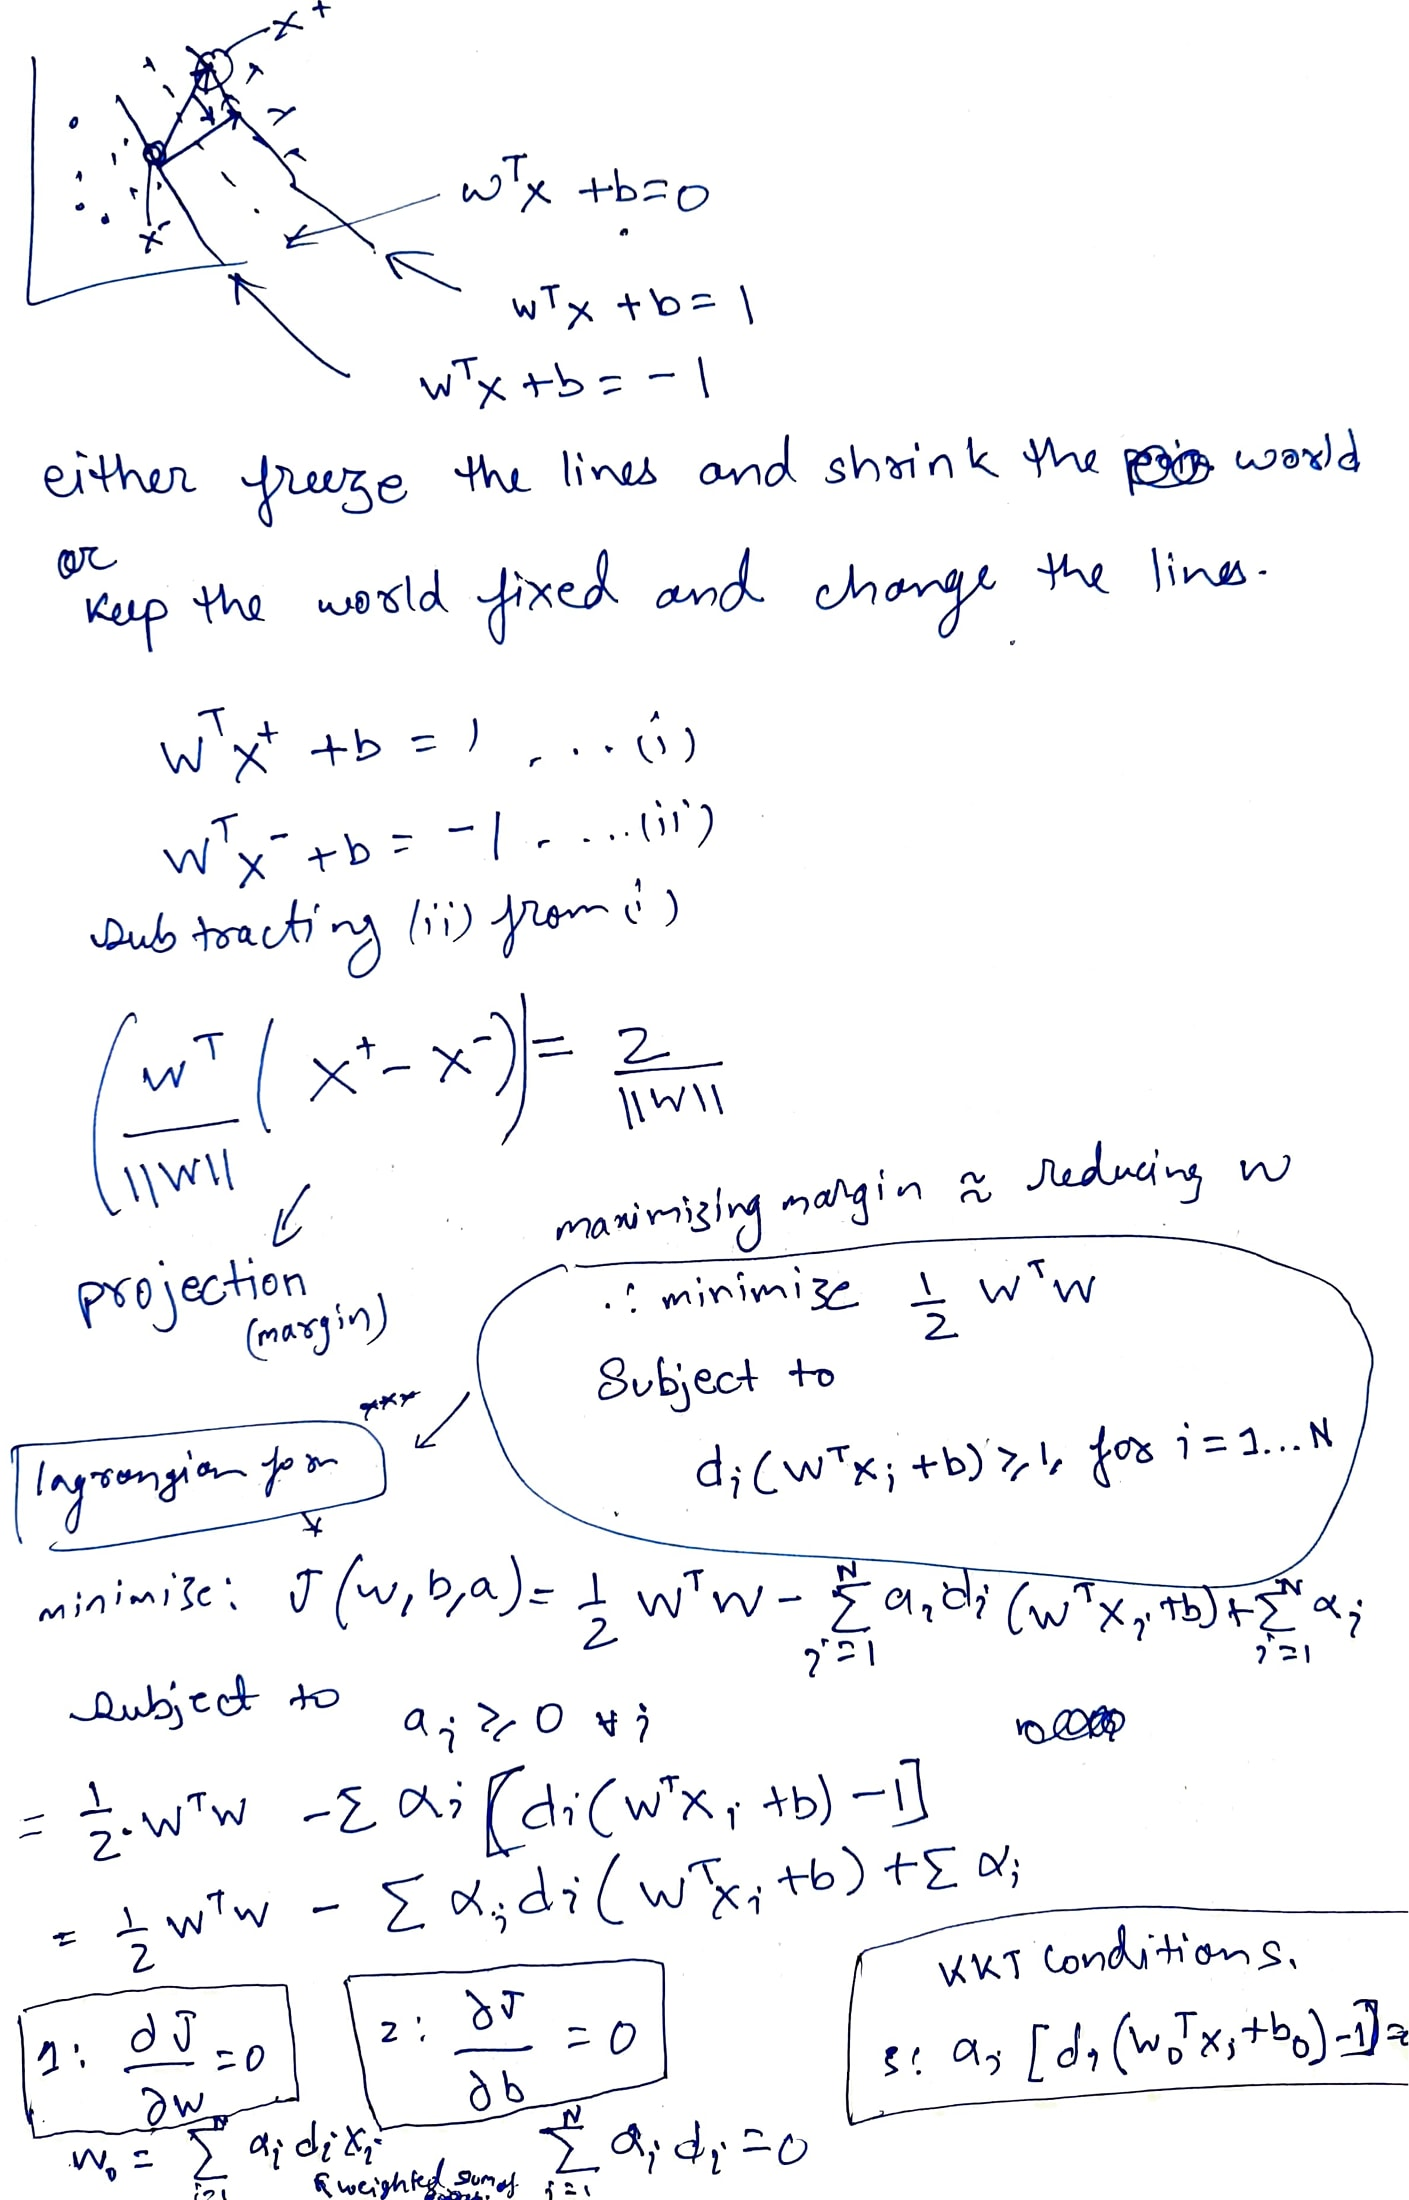

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
pic1 = cv2.imread('/content/pic1.jpg', 1)
pic2 = cv2.imread('/content/pic1.jpg', 1)
cv2_imshow(pic1)
cv2_imshow(pic2)

In [ ]:
# Write your code here
n = X.shape[0]
d = X.shape[1]
w = cp.Variable(d)
b = cp.Variable()

constraints = [y[i]*(X[i]@w + b) >= 1 for i in range(n)]

obj = cp.Minimize(0.5*cp.sum_squares(w))
prob = cp.Problem(obj, constraints)
prob.solve()
print("Optimal w: ", w.value)
print("Optimal b: ", b.value)

Optimal w:  [-1.73913043 -1.30434783]
Optimal b:  -2.91304347826087


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

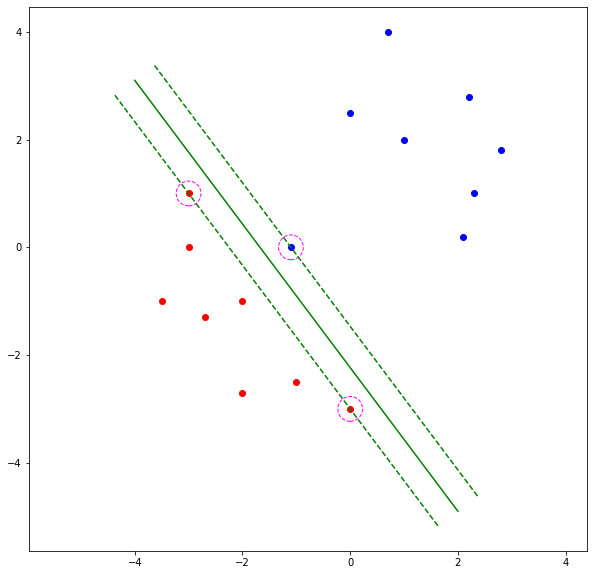

In [ ]:
from matplotlib.patches import Circle
def line_point_dist(slope, intercept, point):
    x, y = point
    numerator = abs(slope * x - y + intercept)
    denominator = np.sqrt(slope ** 2 + 1)
    distance = numerator / denominator
    # print(distance)
    return distance

def visualise(X, Y, w, b, ll, lr):
    fig, ax = plt.subplots(figsize=(10, 10))
    # points
    reds = []
    blues = []
    tiks = list(range(-4, 5))
    # ax.set_xticks(tiks)
    # ax.set_yticks(tiks)
    ax.axis('equal')
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    ax.scatter(reds[:, 0], reds[:, 1], c = 'r')
    ax.scatter(blues[:, 0], blues[:, 1], c = 'b')
    # decision boundary
    x_points = np.linspace(ll, lr, 10)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
    ax.plot(x_points, y_points, c='g')
    # margin lines
    margin = 1 / np.sqrt(np.sum(w ** 2))
    unit_w = w / np.sqrt(np.sum(w**2))
    ax.plot(x_points - unit_w[0] * margin, y_points - unit_w[1] * margin, c='g', linestyle = '--')
    ax.plot(x_points + unit_w[0] * margin, y_points + unit_w[1] * margin, c='g', linestyle = '--')
    # support vectors
    perp_dist = np.sqrt(np.sum((unit_w * margin) ** 2))
    # print(perp_dist)
    for i, point in enumerate(X):
      e = 1e-15
      diff = perp_dist - line_point_dist(-(w[0] / w[1]) , - b / w[1], list(point))
      if Y[i] == 1:
        if point[1] + (w[0] / w[1]) * point[0] + b / w[1] >= 0 or np.abs(diff) < e or diff > 0:
          C = Circle((point[0], point[1]), 0.23, color='magenta',fill=False, linestyle = '--')
          ax.add_patch(C)
      else:
        if point[1] + (w[0] / w[1]) * point[0] + b / w[1] <= 0 or np.abs(diff) < e or diff > 0:
          C = Circle((point[0], point[1]), 0.23, color='magenta',fill=False, linestyle = '--')
          ax.add_patch(C)

visualise(X, y, w.value, b.value, -4, 2)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

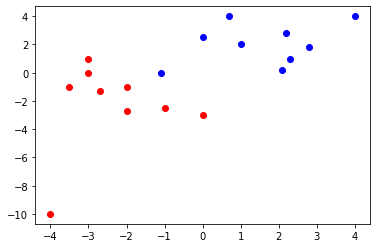

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
X, y= list(X), list(y)

X.append([-4, -10])
X.append([4, 4])
y.append(1)
y.append(-1)

X, y = np.array(X), np.array(y)
plot_points(X, y)
plt.show()

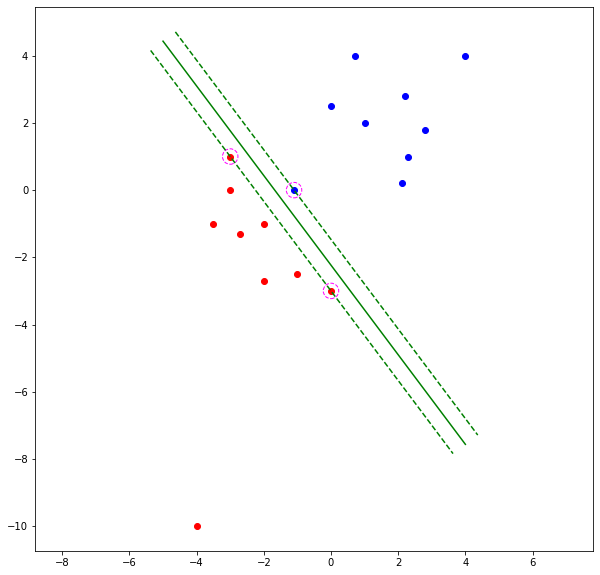

In [ ]:
# Solve for the decision boundary using this modified dataset
visualise(X, y, w.value, b.value, -5, 4)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [ ]:
def cp_solve(X, y, C):
  n = X.shape[0]
  d = X.shape[1]
  w = cp.Variable(d)
  b = cp.Variable()

  xi = cp.Variable(len(y))

  objective = cp.Minimize(cp.sum_squares(w) + C * cp.sum(xi))

  constraints = [y[i]*(X[i]@w + b) >= 1 - xi[i] for i in range(n)] + [xi[i] >= 0 for i in range(n)]

  # Define problem
  prob = cp.Problem(objective, constraints)

  # Solve problem
  prob.solve()
  return w, b


Optimal w:  [-0.136 -0.124]
Optimal b:  -0.02996438030226647


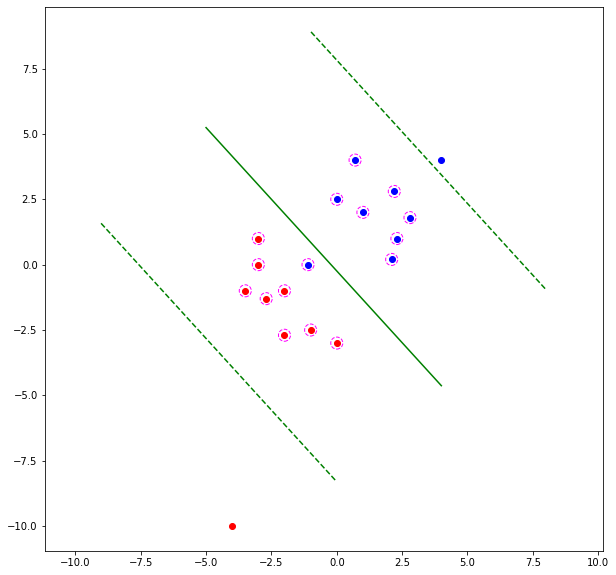

In [ ]:
# Write your code here for C= 0.01
# Write your code here
w, b = cp_solve(X, y, 0.01)
print("Optimal w: ", w.value)
print("Optimal b: ", b.value)
visualise(X, y, w.value, b.value, -5, 4)

Optimal w:  [-0.346 -0.308]
Optimal b:  -0.03799999999999985


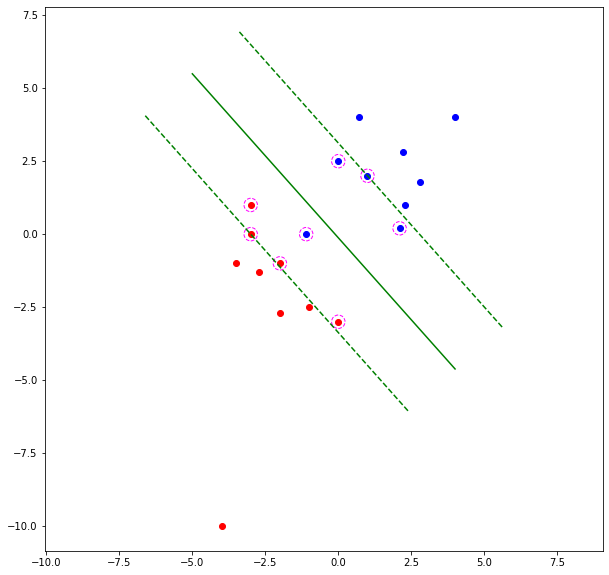

In [ ]:
# Write your code here for C= 0.1
w, b = cp_solve(X, y, 0.1)
print("Optimal w: ", w.value)
print("Optimal b: ", b.value)
visualise(X, y, w.value, b.value, -5, 4)

Optimal w:  [-1.104 -0.828]
Optimal b:  -1.4839999999999995


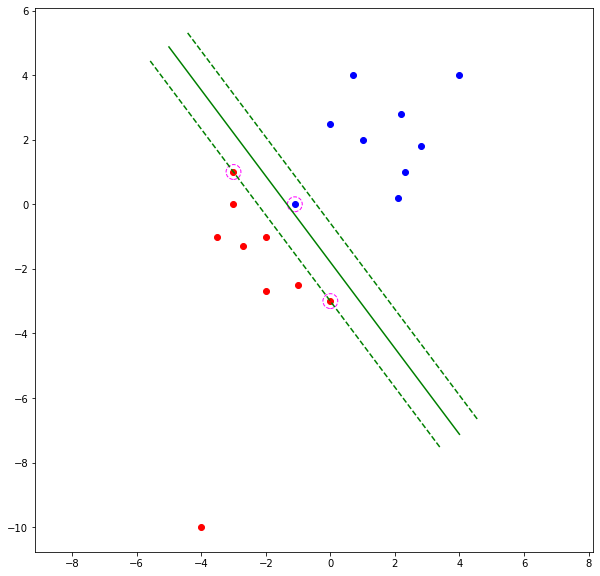

In [ ]:
# Write your code here for C= 3
# Write your code here
w, b = cp_solve(X, y, 3)
print("Optimal w: ", w.value)
print("Optimal b: ", b.value)
visualise(X, y, w.value, b.value, -5, 4)

Optimal w:  [-1.73913043 -1.30434783]
Optimal b:  -2.9130434782608705


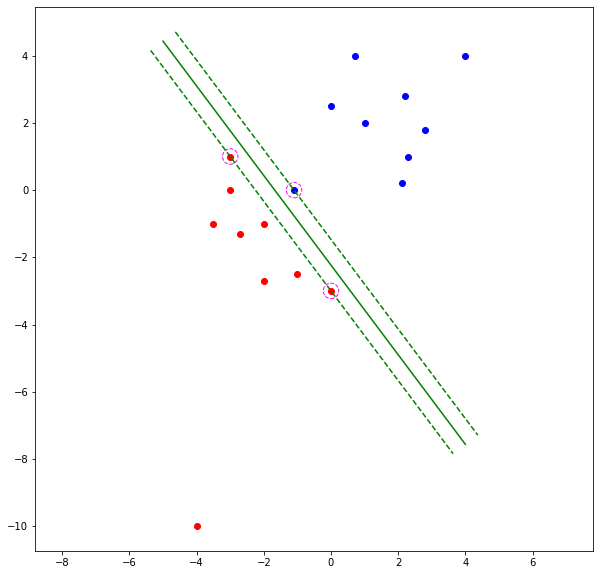

In [ ]:
# Write your code here for C= 10
w, b = cp_solve(X, y, 10)
print("Optimal w: ", w.value)
print("Optimal b: ", b.value)
visualise(X, y, w.value, b.value, -5, 4)

Optimal w:  [-1.73913043 -1.30434783]
Optimal b:  -2.9130434782608705


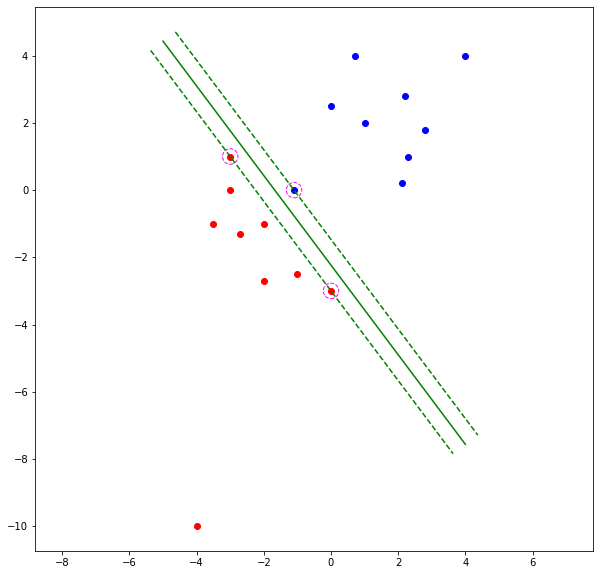

In [ ]:
# Write your code here for C= 100
w, b = cp_solve(X, y, 100)
print("Optimal w: ", w.value)
print("Optimal b: ", b.value)
visualise(X, y, w.value, b.value, -5, 4)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

In [ ]:
w = w.value
b = b.value

In [ ]:
# Write your Code here
# removing support vectors
margin = 1 / np.sqrt(np.sum(w ** 2))
unit_w = w / np.sqrt(np.sum(w**2))
perp_dist = np.sqrt(np.sum((unit_w * margin) ** 2))
X_sv_r = []
y_sv_r = []
for i, point in enumerate(X):
  flag = 0
  e = 1e-15
  diff = perp_dist - line_point_dist(-(w[0] / w[1]) , - b / w[1], list(point))
  if y[i] == 1:
    if point[1] + (w[0] / w[1]) * point[0] + b / w[1] >= 0 or np.abs(diff) < e or diff > 0:
      flag = 1
  else:
    if point[1] + (w[0] / w[1]) * point[0] + b / w[1] <= 0 or np.abs(diff) <e or diff > 0:
      flag = 1
  if flag == 0:
    X_sv_r.append(list(point))
    y_sv_r.append(y[i]) 
X_sv_r = np.array(X_sv_r)
y_sv_r = np.array(y_sv_r)
print(X_sv_r.shape)
print(y_sv_r.shape)

(15, 2)
(15,)


Optimal w:  [-0.38493724 -0.35146444]
Optimal b:  -0.12133891213389122


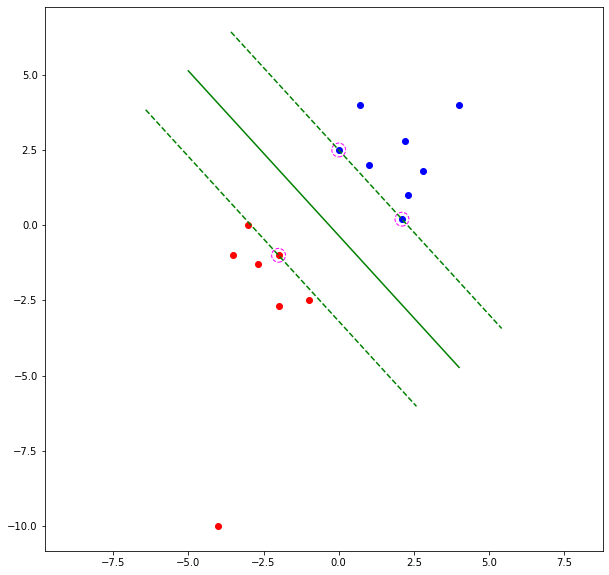

In [ ]:
w, b = cp_solve(X_sv_r, y_sv_r, 100)
print("Optimal w: ", w.value)
print("Optimal b: ", b.value)
visualise(X_sv_r, y_sv_r, w.value, b.value, -5, 4)

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-28 22:26:46--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-03-28 22:26:46 (79.2 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-28 22:26:47--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Len

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [ ]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


Accuracy for C = 0.01 is 20.53%
Accuracy for C = 0.1 is 87.17%
Accuracy for C = 3 is 93.80%
Accuracy for C = 4 is 94.07%
Accuracy for C = 5 is 94.17%
Accuracy for C = 6 is 94.10%
Accuracy for C = 7 is 94.20%
Accuracy for C = 8 is 94.17%
Accuracy for C = 10 is 94.13%
Accuracy for C = 100 is 94.13%


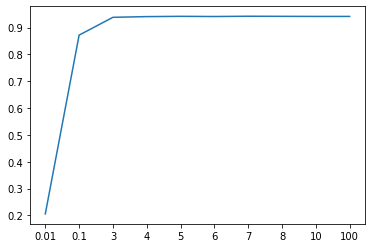

In [ ]:
from sklearn.metrics import accuracy_score
Cs = [0.01 , 0.1, 3, 4, 5, 6, 7, 8, 10, 100]
accs = []
for c in Cs:
  model = SVC(C=c).fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test)
  accs.append(acc)
  print(f"Accuracy for C = {c} is {acc*100:.2f}%")
Cs = [str(val) for val in Cs]
plt.plot(Cs, accs)
plt.show()

Accuracy for C = 7 and gamma = 0 is 11.53%
Accuracy for C = 7 and gamma = 1e-10 is 25.20%
Accuracy for C = 7 and gamma = 1e-09 is 84.53%
Accuracy for C = 7 and gamma = 1e-08 is 90.20%
Accuracy for C = 7 and gamma = 1e-07 is 93.00%
Accuracy for C = 7 and gamma = 1e-06 is 90.13%
Accuracy for C = 7 and gamma = 1e-05 is 18.33%
Accuracy for C = 7 and gamma = 0.001 is 11.53%
Accuracy for C = 7 and gamma = 0.1 is 11.53%
Accuracy for C = 7 and gamma = 1 is 11.53%
Accuracy for C = 7 and gamma = 10 is 11.53%


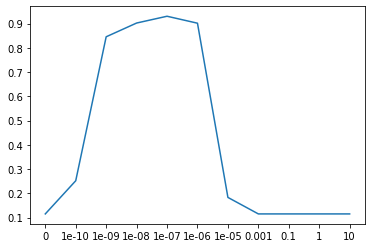

In [ ]:
gamma = [0, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-3, 0.1, 1, 10]
accs = []
for g in gamma:
  model = SVC(C=7, gamma=g).fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test)
  accs.append(acc)
  print(f"Accuracy for C = 7 and gamma = {g} is {acc*100:.2f}%")
gamma = [str(val) for val in gamma]
plt.plot(gamma, accs)
plt.show()

Accuracy for C = 7, gamma = scale and kernel = linear is 88.93%
Accuracy for C = 7, gamma = scale and kernel = poly is 92.40%
Accuracy for C = 7, gamma = scale and kernel = rbf is 94.20%
Accuracy for C = 7, gamma = scale and kernel = sigmoid is 79.77%


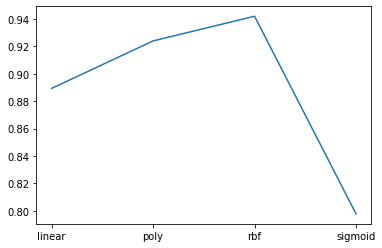

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accs = []
for k in kernels:
  model = SVC(C=7, gamma='scale', kernel=k).fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test)
  accs.append(acc)
  print(f"Accuracy for C = 7, gamma = scale and kernel = {k} is {acc*100:.2f}%")
kernels = [str(val) for val in kernels]
plt.plot(kernels, accs)
plt.show()